# Imports des librairies

In [60]:
# à lancer pour installer les extensions nécessaires
# !pip install networkx
# !pip install matplotlib
# !pip install pillow
# !pip install json
# !pip install scipy

In [61]:
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import json
import scipy

## Chargement des données des vidéos et des nombres d'abonnées

In [62]:
with open("collaborations.json", encoding="utf-8") as file:
    collaborations_data = json.load(file)

with open("collaborations.json", encoding="utf-8") as file:
    collaborations_data = json.load(file)

## Création du Graphe et ajout des collaborations

In [63]:
# Création du graphe
G = nx.MultiGraph() 

# Ajout des nœuds et des arêtes avec des vidéos comme attribut
for youtuber, collaborators in collaborations_data.items():
    for collaborator, videos in collaborators.items():
        # Ajouter une arête avec un poids correspondant au nombre de collaborations
        weight = len(videos)
        # Si l'autre youtube existe
        if collaborator in collaborations_data:
            # Si l'autre youtube a collaboré avec le youtube actuel
            if youtuber in collaborations_data[collaborator]:
                # On additionne les collaborations
                weight += len(collaborations_data[collaborator][youtuber])
        G.add_edge(youtuber, collaborator, weight=weight**1.1)

## Visualisation du graphe

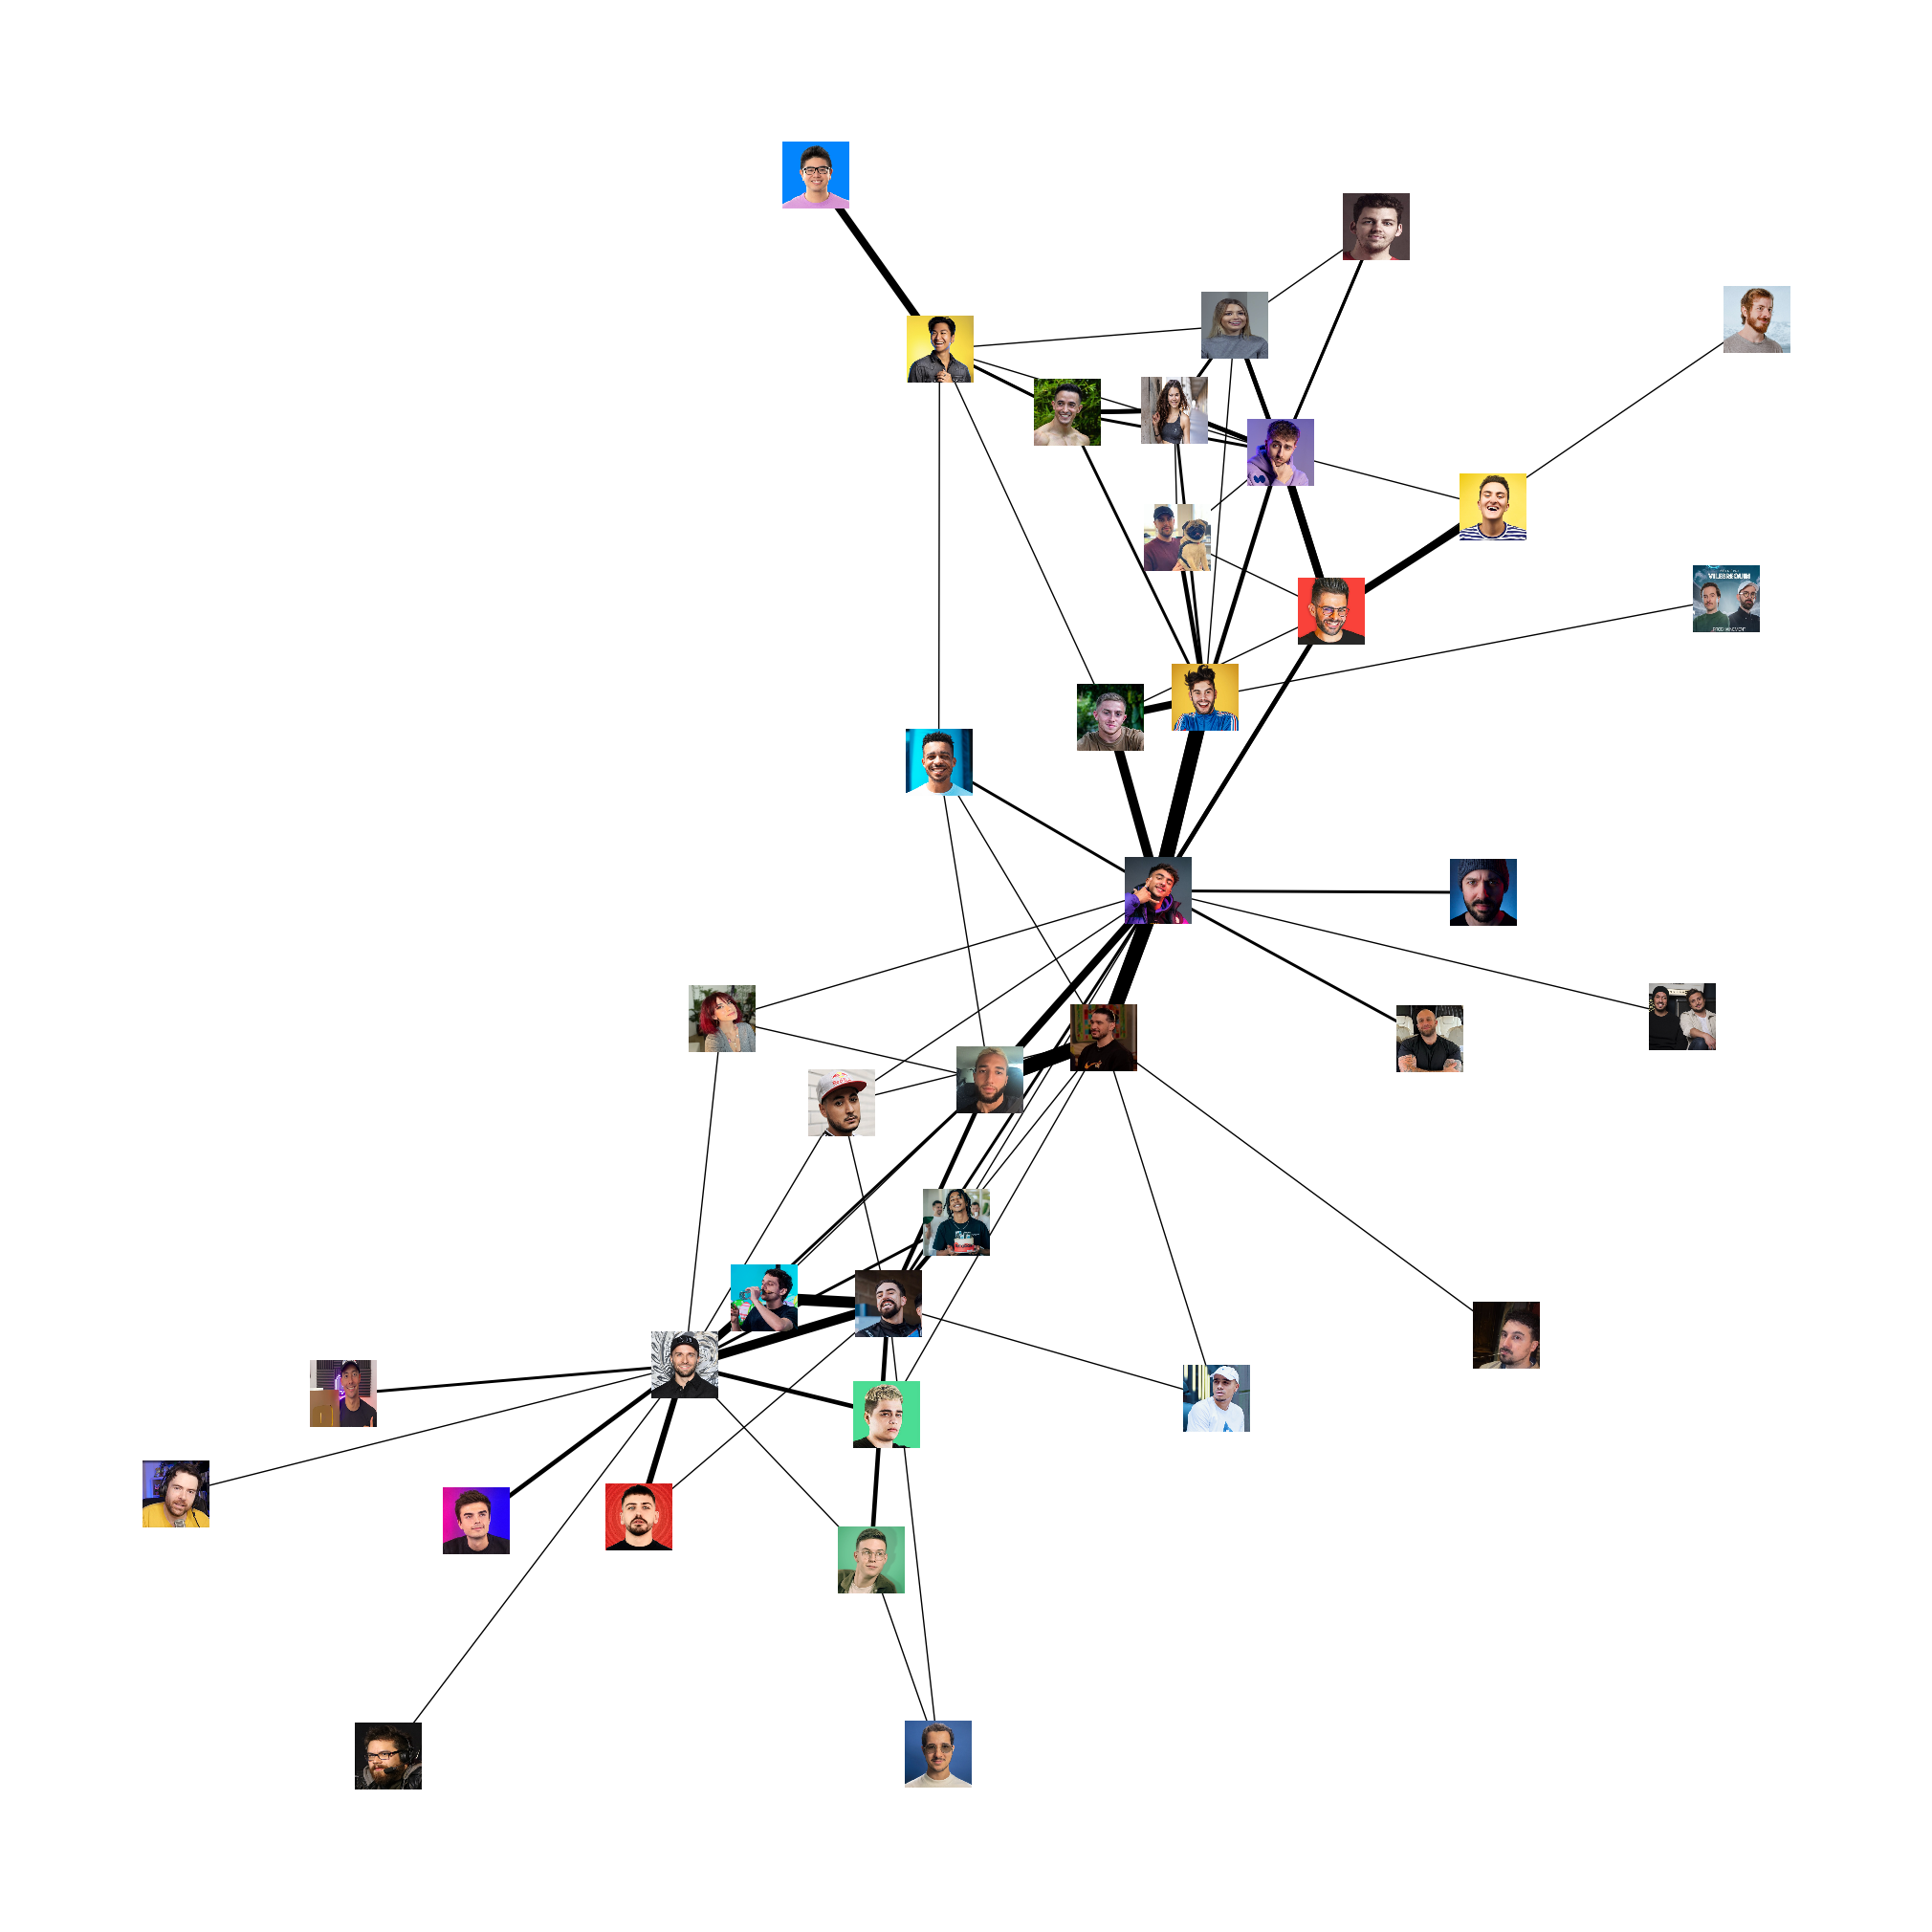

In [64]:
# Visualisation basique du graphe
pos = nx.fruchterman_reingold_layout(G)  #algorithme de positionnement
edges = G.edges(data=True)

plt.figure(figsize=(20, 20))  # Augmentez la taille du graphique ici

# Calculer l'épaisseur des arêtes basée sur le poids
edge_thickness = [d['weight'] for *_, d in edges]

# Dessiner le graphe
nx.draw(G, pos, width=edge_thickness, with_labels=False, edge_color='black')


# Ajout des images redimensionnées
for youTuber in G.nodes():
    img_path = f"assets/{youTuber}.png"
    with Image.open(img_path) as img:
        img_resized = img.resize((250, 250))  # Redimensionner l'image
        imagebox = OffsetImage(img_resized, zoom=0.2)
        ab = AnnotationBbox(imagebox, pos[youTuber], frameon=False)
        plt.gca().add_artist(ab)

plt.show()